In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [101]:
# Import dataset
data = pd.read_csv("C:/Sophia/School!!!/2023 Spring 1/DS take home/3.Employee_rentation/Employee_Rentation.csv", parse_dates=['join_date', 'quit_date'])
data = data.drop(data.columns[0], axis = 1)

In [102]:
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   employee_id  24702 non-null  float64       
 1   company_id   24702 non-null  int64         
 2   dept         24702 non-null  object        
 3   seniority    24702 non-null  int64         
 4   salary       24702 non-null  float64       
 5   join_date    24702 non-null  datetime64[ns]
 6   quit_date    13510 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 1.3+ MB


In [104]:
data.describe(include = 'all')

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
count,24702.000000,24702.000000,24702,24702.000000,24702.000000,24702,13510
unique,NaN,NaN,6,NaN,NaN,995,664
top,NaN,NaN,customer_service,NaN,NaN,2012-01-03 00:00:00,2015-05-08 00:00:00
freq,NaN,NaN,9180,NaN,NaN,105,111
first,NaN,NaN,NaN,NaN,NaN,2011-01-24 00:00:00,2011-10-13 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2015-12-10 00:00:00,2015-12-09 00:00:00
mean,501604.403530,3.426969,NaN,14.127803,138183.345478,NaN,NaN
std,288909.026101,2.700011,NaN,8.089520,76058.184573,NaN,NaN
min,36.000000,1.000000,NaN,1.000000,17000.000000,NaN,NaN
25%,250133.750000,1.000000,NaN,7.000000,79000.000000,NaN,NaN


"seniority' columns seems to have abnormal values.

<AxesSubplot:xlabel='seniority', ylabel='count'>

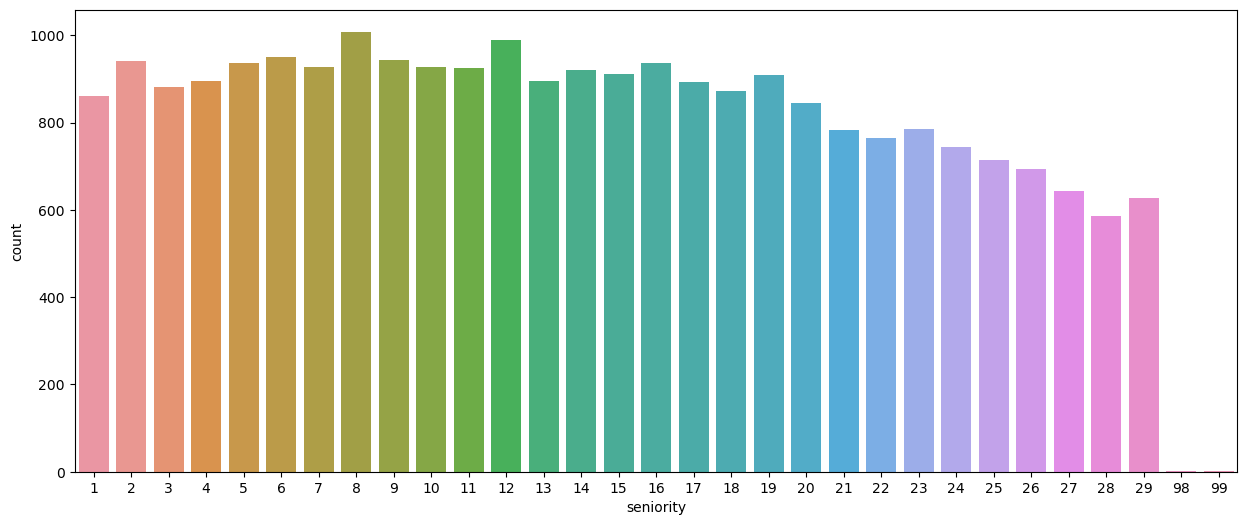

In [105]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(data.seniority)

In [106]:
data = data[data.seniority<35]

In [107]:
data.isnull().sum()

employee_id        0
company_id         0
dept               0
seniority          0
salary             0
join_date          0
quit_date      11192
dtype: int64

### Q1. Create a table with 3 columns: day, employee_headcount, company_id

In [108]:
unique_date = pd.date_range(start='2011-01-24', end='2015-12-13', freq='D')
unique_company = sorted(data['company_id'].unique())

In [109]:
day = []
company = []
headcount = []

for date in unique_date:
    for idx in unique_company:
        total_join = len(data[(data['join_date'] <= date) & (data['company_id'] == idx)])
        total_quit = len(data[(data['quit_date'] <= date) & (data['company_id'] == idx)])
        day.append(date)
        company.append(idx)
        headcount.append(total_join - total_quit)
        
# Create table for day, employee_headcount, company_id
table = pd.DataFrame({'day': day, 'company_id': company, 'employee_headcount': headcount}, 
                     columns=['day', 'company_id', 'employee_headcount'])

In [110]:
table.head()

,day,company_id,employee_headcount
0,2011-01-24,1,25
1,2011-01-24,2,17
2,2011-01-24,3,9
3,2011-01-24,4,12
4,2011-01-24,5,5


### Q2: What are the main factors that drive employee churn? Do they make sense?

In [111]:
quitted_data = data[~data['quit_date'].isnull()]

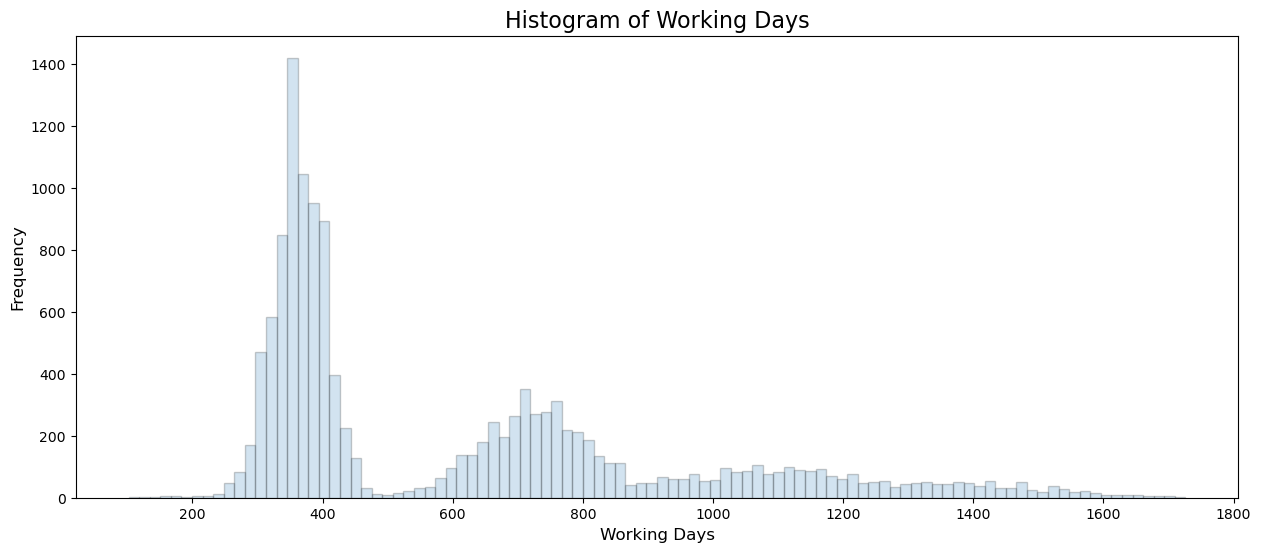

In [112]:
# Total working days
work_days = np.array(list(map(lambda x: x.days, quitted_data['quit_date'] - quitted_data['join_date'])))

hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(figsize=(15, 6))
sns.distplot(work_days, bins=100, kde=False, ax=ax, hist_kws=hist_kws)
ax.set_title('Histogram of Working Days', fontsize=16)
ax.set_xlabel('Working Days', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.show()

The graph shows that there are peaks around each employee year anniversary.

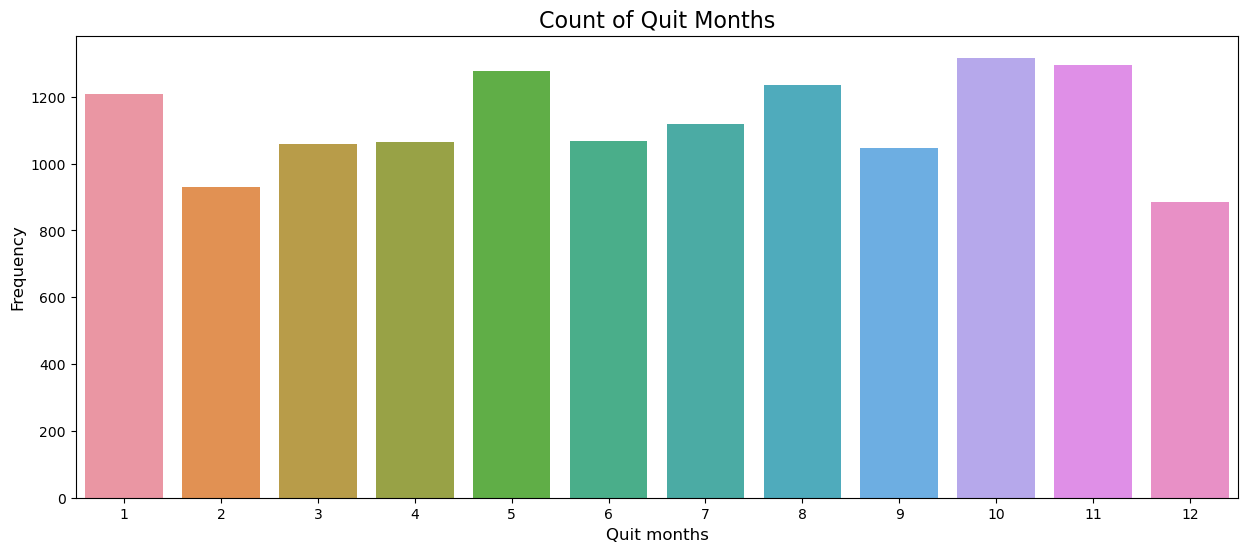

In [113]:
# Month for quiting
month = np.array(list(map(lambda x: x.month, quitted_data['quit_date'] )))

fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(month, ax=ax)
ax.set_title('Count of Quit Months', fontsize=16)
ax.set_xlabel('Quit months', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.show()

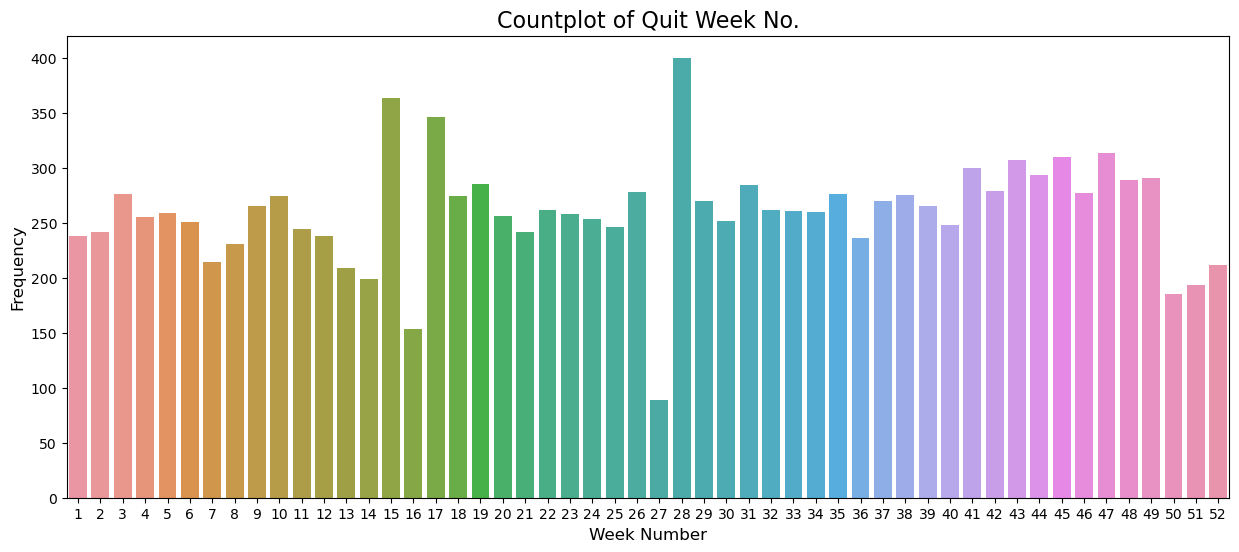

In [114]:
# Week No. for quiting
quit_week = np.array(list(map(lambda x: x.week, quitted_data['quit_date'])))

fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(quit_week, ax=ax)
ax.set_title('Countplot of Quit Week No.', fontsize=16)
ax.set_xlabel('Week Number', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.show()

### Performing EDA to see if there's additional correlation to churn.

With the dataset, we can look into:

Categorical Values:
 - if a specific company has higher churn rate than other companies
 - if a specific department has higher churn rate than other departments

Numerical Values:
 - if seniority affects churn
 - if salary affects churn

##### Categorical Values

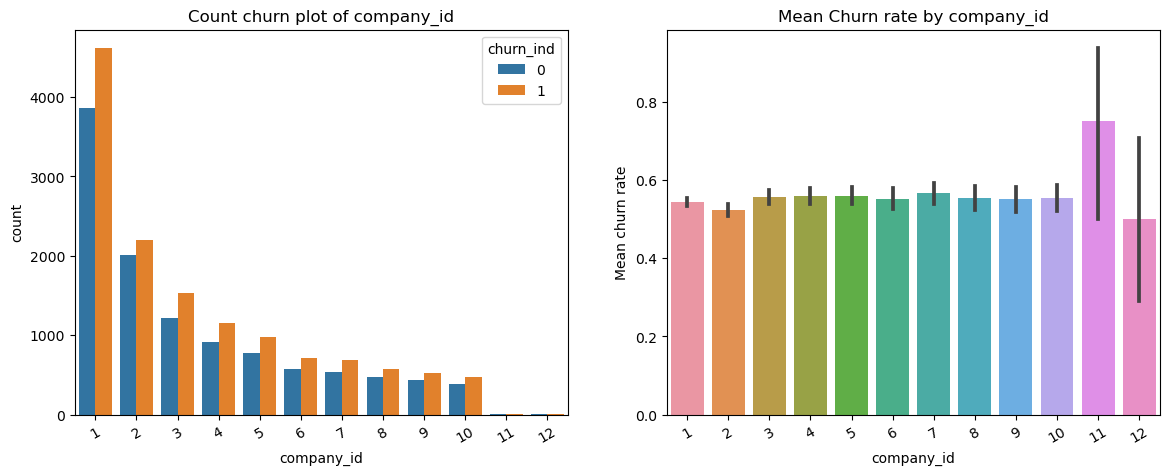

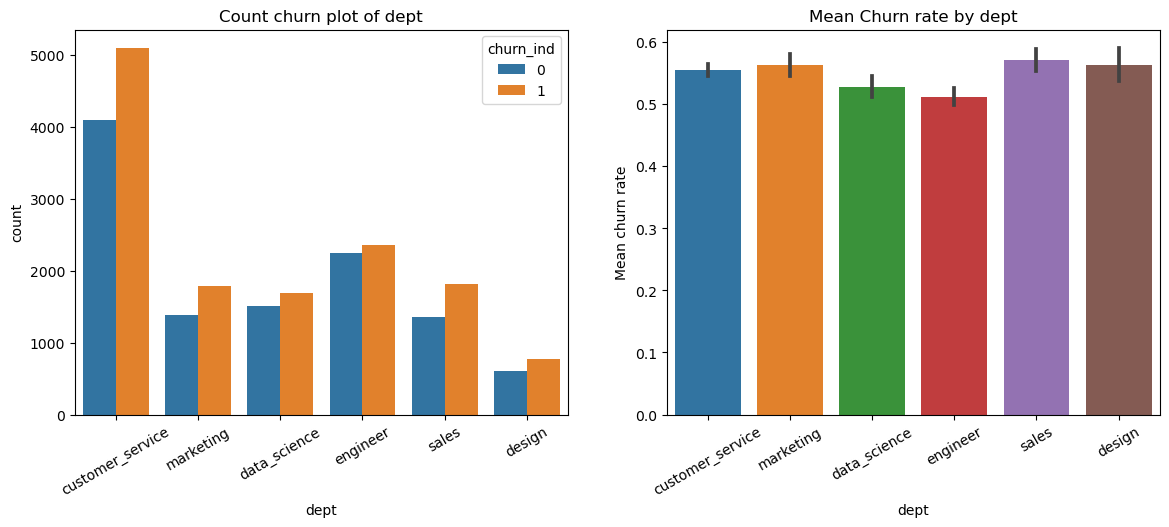

In [115]:
data['churn_ind'] = data.quit_date.apply(
    lambda x: 0 if pd.isnull(x) else 1)

for col in ['company_id', 'dept']:
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14,5))
    sns.countplot(x = col, hue = 'churn_ind', data = data, ax = ax[0])
    sns.barplot(x = col, y = 'churn_ind', data = data, ax=ax[1])
    ax[0].set_title('Count churn plot of {}'.format(col))
    ax[1].set_ylabel('Mean churn rate')
    ax[1].set_title('Mean Churn rate by {}'.format(col))
    
    ax[0].tick_params(axis='x', rotation=30)
    ax[1].tick_params(axis='x', rotation=30)

From categorical values, we can see that:

- Looking across company, company 11 has a higher churn rate than other companies, but they also had a relative small sample of data.
- Looking across dept, engineering and data_science seems to have lower churn than other dept.

##### Numerical Values

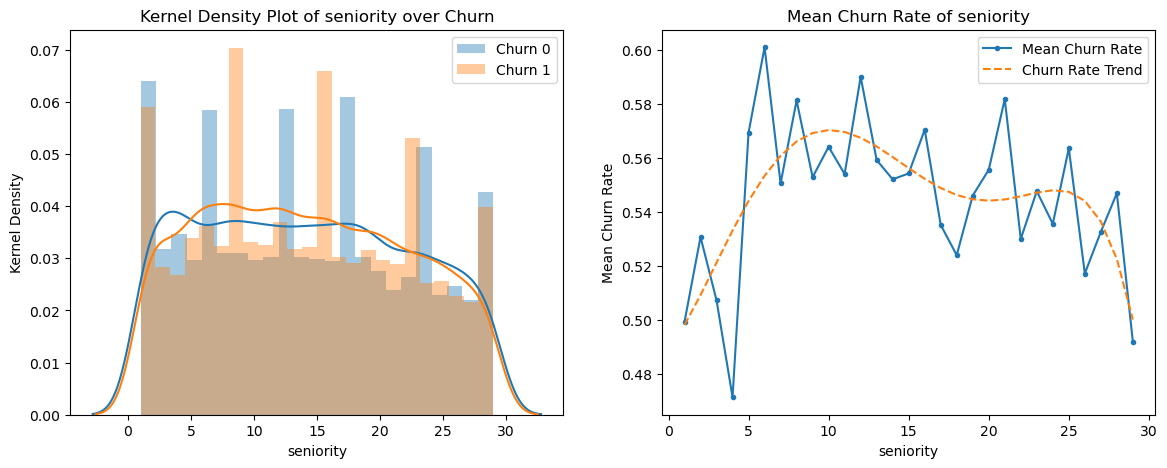

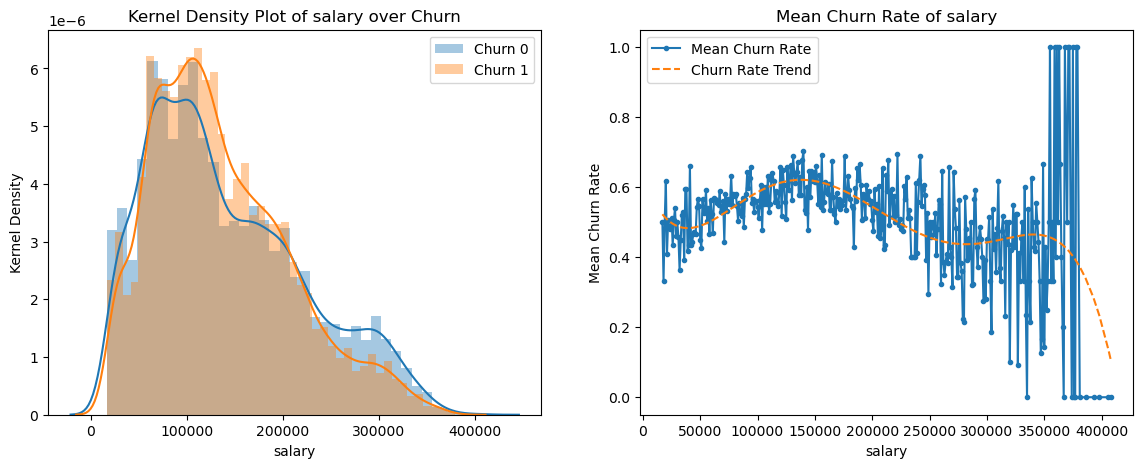

In [116]:
for col in ['seniority','salary']:
    # setting up figure and axes
    fig, ax = plt.subplots(nrows=1, ncols = 2, figsize = (14,5))
    
    # setting up 2nd graph's ploynomial regression 
    grouped_data = data[[col,'churn_ind']].groupby(col).mean().reset_index()
    x= np.array(grouped_data[col])
    y= np.array(grouped_data['churn_ind'])
    fit = np.polyfit(x,y,5)
    fit_func = np.poly1d(fit)
    
    # plotting 1st graph
    sns.distplot(data[data.churn_ind == 0][col], label = 'Churn 0', ax= ax[0])
    sns.distplot(data[data.churn_ind == 1][col], label = 'Churn 1', ax= ax[0])
    ax[0].legend()
    ax[0].set_title('Kernel Density Plot of {} over Churn'.format(col))
    ax[0].set_ylabel('Kernel Density')
    
    # plotting 2nd graph
    plt.plot(col, 'churn_ind', '.-',
             data = data[[col, 'churn_ind']].groupby(col).mean().reset_index()
            )
    plt.plot(x, fit_func(x), '--')
    ax[1].legend(['Mean Churn Rate','Churn Rate Trend'])
    ax[1].set_title('Mean Churn Rate of {}'.format(col))
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('Mean Churn Rate')

For numeric values, we can see that:

 - Looking at seniority, it seems like there is a general downward trend towards seniority -- i.e. the longer the employee stays, the less they tend to churn; also, we can see from the KDE plot that people with seniority between 5 - 17 months tend to have higher churn rate than those who do not belong to this group.
 - Looking at salary, it seems like there is a general downward trend as well -- the better the employees are compensated, the less they are likely to churn. This does have exceptions as you can see from the bottom right graph where some well-compensated employees still churned; additionally, if we look at the KDE plot of employee salary over Churn, we can see that people in salary range of 100k to 200k generally have a higher churn rate than people are not in this range.

As a result, what would be actionable based on these insights

1. Get more data points on Company 11 to see if it's true that they have higher churn rate than other companies
2. Based on the findings we get from the dataset, if we were to reduce churn rate, we should target:
 - Focus on customer_service and sales if you have limited resources, as the churn rate is relatively high in comparison to other departments and they have a high amount of people churning as well.
 - Employees who has been with the company for about 5-17 months of seniority and between salary range of 100k to 200k have indicated a higher churn rate for those numeric characteristics.